# **Specific Data Analysis**:<a class="anchor" id="0"></a>


1. [**products**](#1)
2. [**orders**](#2)
3. [**order_products__prior**](#3)
4. [**departments**](#4)

In [3]:
import os

import numpy as np
import pandas as pd

from _util.custom_plotting import *
from _util.custom_mem_opt import custom_mem_opt

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()

import pprint
pp = pprint.PrettyPrinter(width=25, compact=True)

root = './_data/'

The dataset contains relational set of files describing customers' orders over time. For each user, 4 to 100 orders are provided with the sequence of products purchased in each order. The data of the order's week and hour of the day as well as a relative measure of time between orders is provided.

**Files in the Dataset:** 

In [4]:
pp.pprint(os.listdir('_data/'))

['products.csv',
 'orders.csv',
 'order_products__train.csv',
 'departments.csv',
 'aisles.csv',
 'order_products__prior.csv',
 'sample_submission.csv']


In [5]:
aisles = custom_mem_opt(pd.read_csv(root + 'aisles.csv'), verbose=False)
departments = custom_mem_opt(pd.read_csv(root + 'departments.csv'), verbose=False)
orders = custom_mem_opt(pd.read_csv(root + 'orders.csv'), verbose=False)
order_products_prior = custom_mem_opt(pd.read_csv(root + 'order_products__prior.csv'), verbose=False)
order_products_train = custom_mem_opt(pd.read_csv(root + 'order_products__train.csv'), verbose=False)
products = custom_mem_opt(pd.read_csv(root + 'products.csv'), verbose=False)

### products: <a class=anchor id="1"></a>
[Back to top](#0)

- 49688 products by aisle and department.
- Variation of product ct. by aisle / dept.

In [7]:
products.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [8]:
print(len(products.product_name.unique()))

49688


In [9]:
print(len(products.aisle_id.unique()))

134


In [10]:
print(len(products.department_id.unique()))

21


In [11]:
temp_df = pd.DataFrame(products.groupby('aisle_id')['product_id'].count()).reset_index()
temp_df.columns = ['aisle_id', 'product_count']

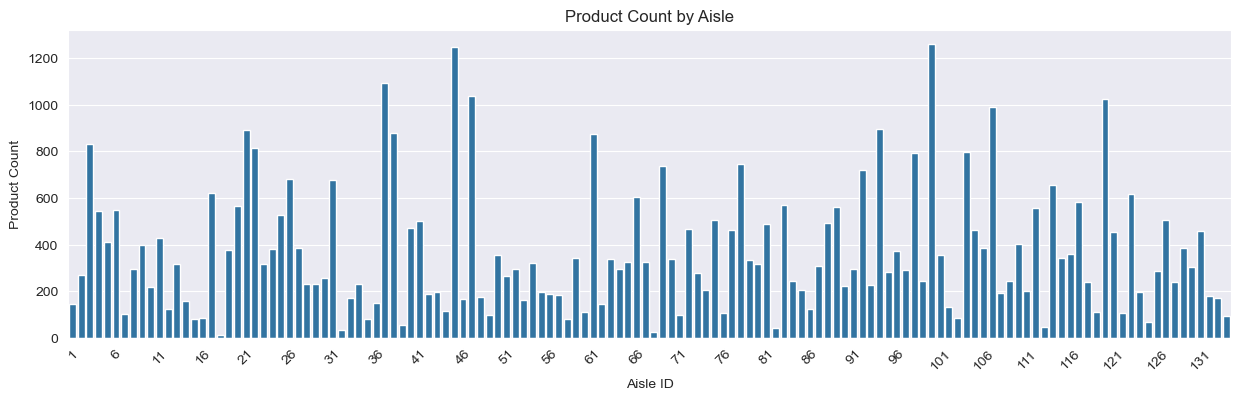

In [12]:
simple_bar(temp_df
           , x='aisle_id'
           , y='product_count'
           , title='Product Count by Aisle'
           , xlabel='Aisle ID'
           , ylabel='Product Count'
           , palette=None
           , figsize=(15, 4))

In [13]:
temp_df = pd.DataFrame(products.groupby('department_id')['product_id'].count()).reset_index()
temp_df.columns = ['department_id', 'product_count']

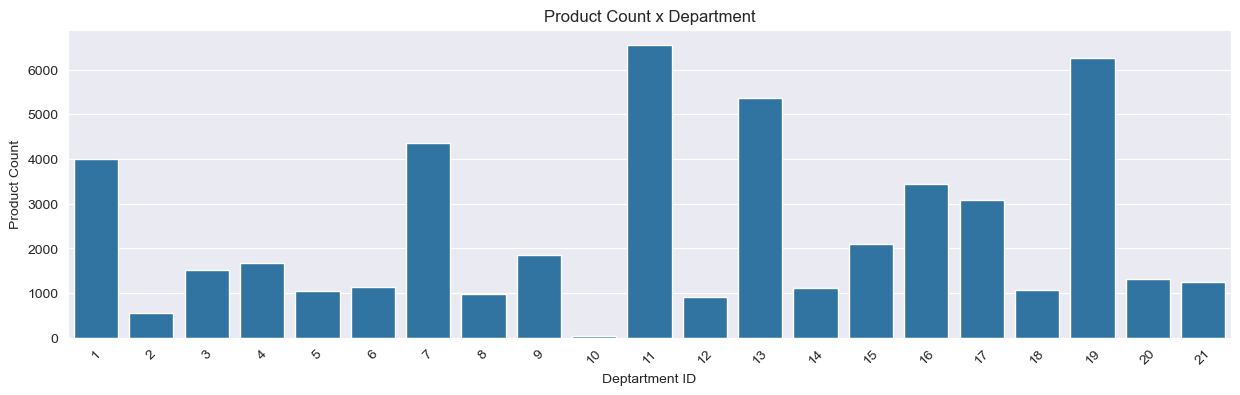

In [14]:
simple_bar(temp_df
           , x='department_id'
           , y='product_count'
           , title='Product Count x Department'
           , xlabel='Deptartment ID'
           , ylabel='Product Count'
           , palette=None
           , n=1
           , figsize=(15, 4))

In [15]:
temp_df = pd.DataFrame(products.groupby('department_id')['aisle_id'].nunique()).reset_index()
temp_df.columns = ['department_id', 'aisle_count']

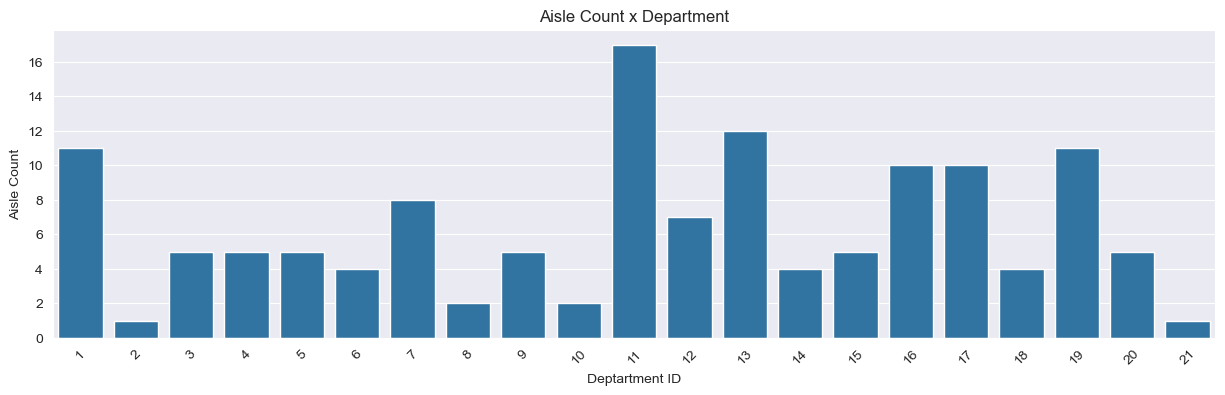

In [16]:
simple_bar(temp_df
           , x='department_id'
           , y='aisle_count'
           , title='Aisle Count x Department'
           , xlabel='Deptartment ID'
           , ylabel='Aisle Count'
           , palette=None
           , n=1
           , figsize=(15, 4))

### orders: <a class=anchor id="2"></a>
[Back to top](#0)

- There are total 3421083 orders made by total 206209 users.
- There are three sets of orders: Prior, Train and Test. The distributions of orders in Train and Test sets are similar whereas the distribution of orders in Prior set is different.
- The total orders per customer ranges from 0 to 100. 
- Majority of the orders are made during the day time.

In [19]:
orders.head(12)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [20]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   user_id                 int32  
 2   eval_set                object 
 3   order_number            int8   
 4   order_dow               int8   
 5   order_hour_of_day       int8   
 6   days_since_prior_order  float16
dtypes: float16(1), int32(2), int8(3), object(1)
memory usage: 68.5+ MB


In [21]:
print(len(orders.order_id.unique()))

3421083


In [22]:
print(len(orders.user_id.unique()))

206209


In [23]:
print(orders.eval_set.value_counts())

eval_set
prior    3214874
train     131209
test       75000
Name: count, dtype: int64


In [24]:
print(orders.order_number.describe().apply(lambda x: format(x, '.2f')))

count    3421083.00
mean          17.15
std           17.73
min            1.00
25%            5.00
50%           11.00
75%           23.00
max          100.00
Name: order_number, dtype: object


In [25]:
order_number = orders.groupby('user_id')['order_number'].max()
order_number = pd.DataFrame(order_number.value_counts()).reset_index()

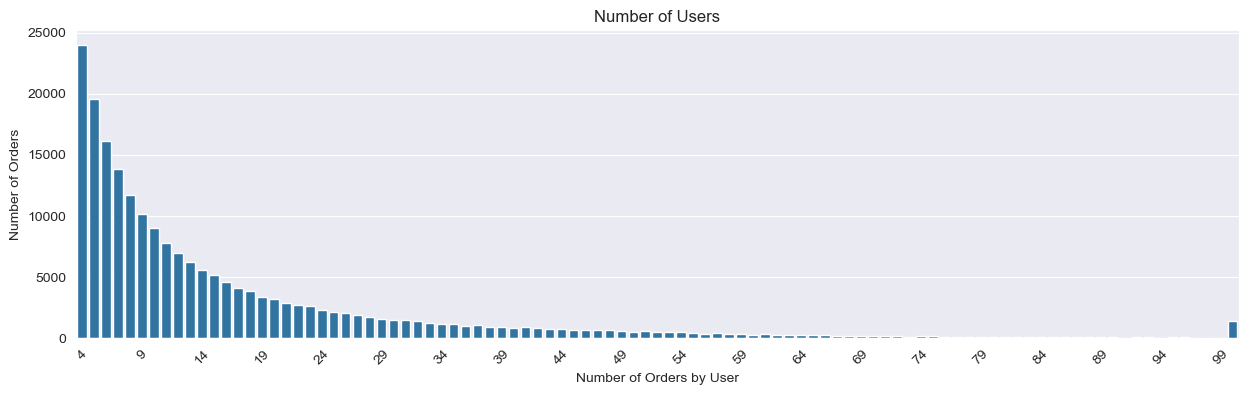

In [26]:
simple_bar(order_number
           , x='order_number'
           , y='count'
           , xlabel='Number of Orders by User'
           , ylabel='Number of Orders'
           , title='Number of Users'
           , palette=None
           , figsize=(15, 4))

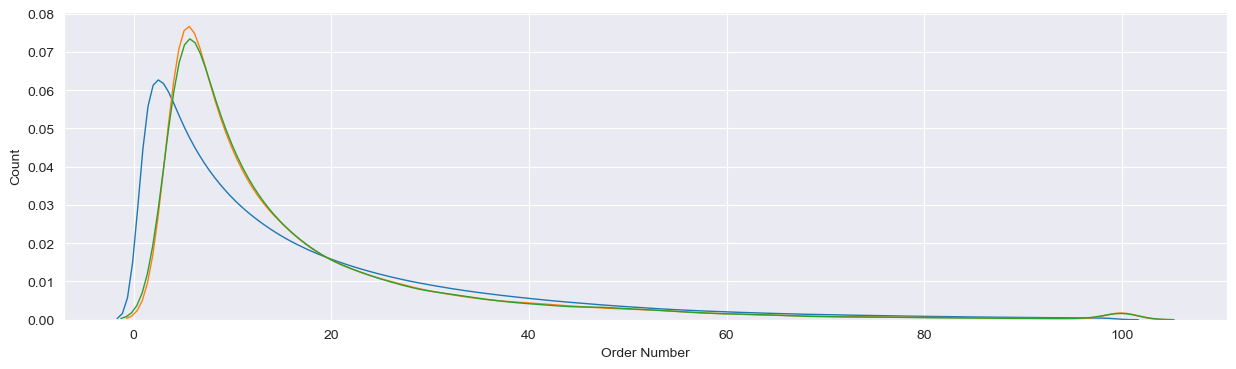

In [29]:
fig, ax = plt.subplots(figsize = (15,4))
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'prior'], label = "Prior set", lw = 1)
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'train'], label = "Train set", lw = 1)
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'test'], label = "Test set", lw = 1)
ax.set_xlabel('Order Number')
ax.set_ylabel('Count')
ax.tick_params(axis = 'both', labelsize = 10)

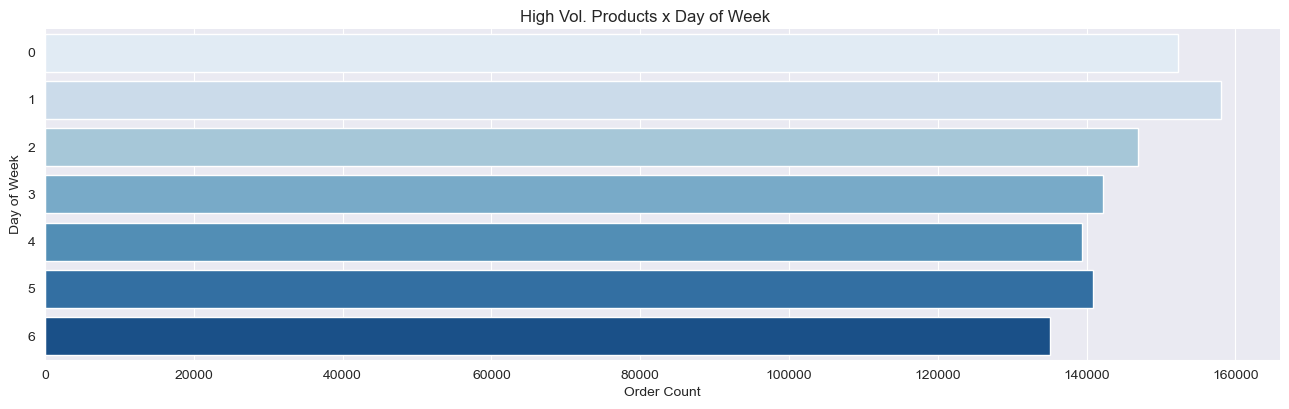

In [30]:

temp_df = pd.DataFrame(orders.groupby('order_dow')['user_id'].nunique()).reset_index()
horizontal_catplot(temp_df
                   , "user_id"
                   , "order_dow"
                   , x_label='Order Count'
                   , y_label='Day of Week'
                   , title='High Vol. Products x Day of Week'
                   , figsize=(13, 4), color='Blues')

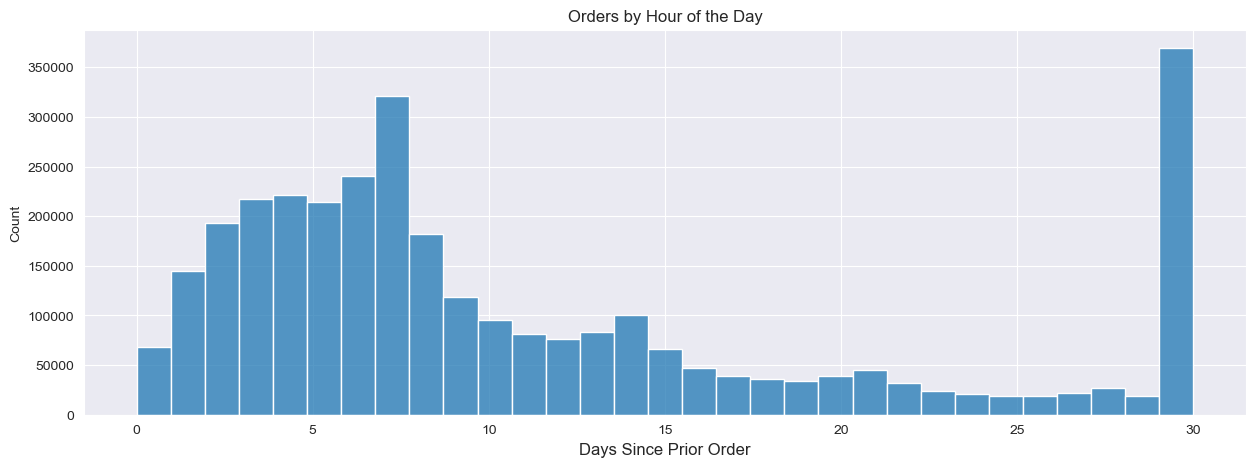

In [31]:
histogram_boxplot(orders
                  , x='days_since_prior_order'
                  , xlabel='Days Since Prior Order'
                  , bins=orders.days_since_prior_order.nunique()
                  , title='Orders by Hour of the Day'
                  , boxplot=False)

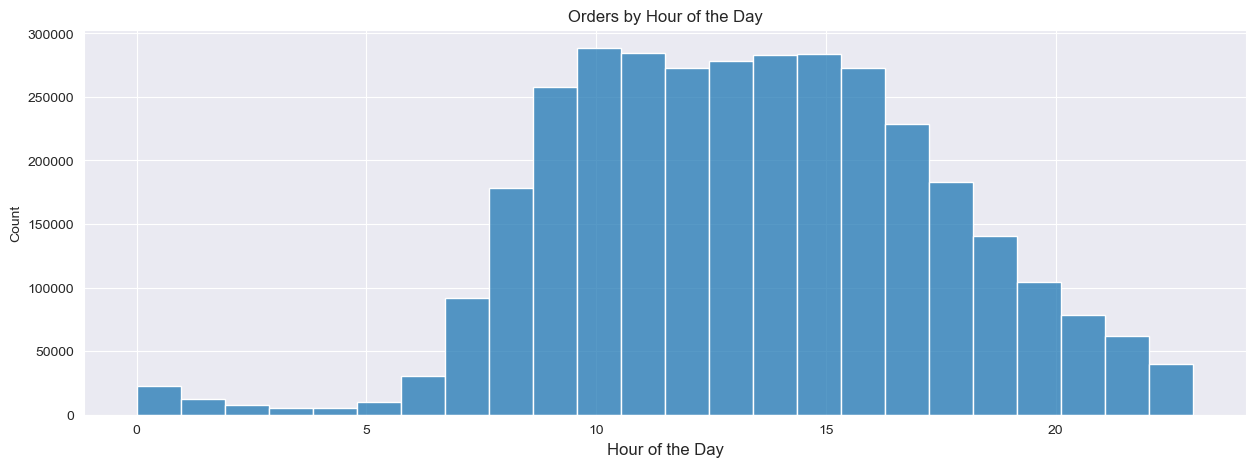

In [32]:
histogram_boxplot(orders
                  , x='order_hour_of_day'
                  , xlabel='Hour of the Day'
                  , bins=24
                  , title='Orders by Hour of the Day'
                  , boxplot=False)

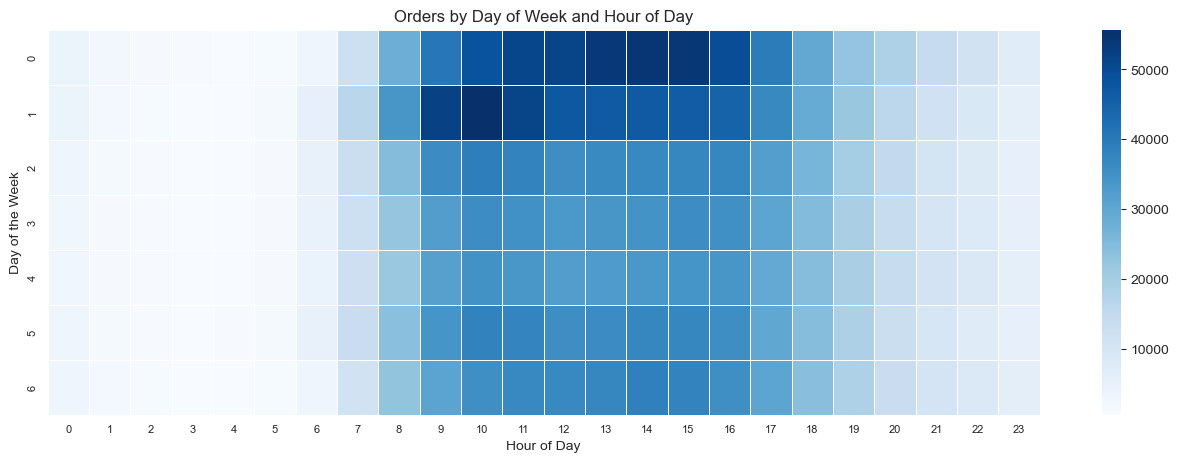

In [33]:
temp_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
temp_df = temp_df.pivot(index='order_dow', columns='order_hour_of_day', values='order_number')

simple_heatmap(data=temp_df,title='Orders by Day of Week and Hour of Day', x_label='Hour of Day', y_label='Day of the Week', figsize=(16,5))